# Predicting the Interest Rate of the Lending Club Loan data

<center><h1>*Exploratory Data Analysis*</h1></center>
<center><h1>*--------------------------------------------------------------------------------------------*</h1></center>


***

![LendingClub](https://creditkarmacdn-a.akamaihd.net/res/content/reviews/lending-club-personal-loans/title.png)
<div>
<center><font color=darkblue>
    <h3></h3>
    <h3>A PROJECT BY:</h3></font>
         <h2><a href='https://www.linkedin.com/in/nerkarnilesh/'> Nilesh Vanshikumar Nerkar (001899192)  </a></h2>
        </center>
</div>


<div>
    <h2>&#10162; Table of Content: </h2>
        <h3>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &#10420; [Introduction](#Introduction) </h3>
        <h3>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &#10420; [Imports](#Imports)</h3>
        <h3>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &#10420; [Data Preprocessing](#Data_Preprocessing)</h3>
        <h3>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &#10420; [Data Analysis](#Data_Analysis)</h3>      
</div>

<h3><a id="Introduction">&#9997; Introduction</a></h3>

 <h4> The Data: </h4>
Lending Club (LC) is the world’s largest online marketplace connecting borrowers and investors. It is
transforming the banking system to make credit more affordable and investing more rewarding. Lending Club
operates at a lower cost than traditional bank lending programs and pass the savings on to borrowers in the
form of lower rates and to investors in the form of solid risk-adjusted returns.

Load the dataset that is about 2GB in CSV format.

The dataset has 145 columns and 2260668 rows

 <h4> The Goal: </h4>

* The goal is to explore the data to understand the distribution and zero-in on the predictors that help our analysis

<h4> What to Do: </h4>

* First, load the Lending club loan and use python visualization libraries to understand the data.


<h4> Data Dictionary For Lending Loan Club </h4> 

* A data dictionary file is also been provided along with the loan data. This file gives a brief describtion about all the columns of the loan transaction file.

In [2]:
import pandas as pd 
Data_dict=pd.read_excel('LCDataDictionary.xlsx')
Data_dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


###  Lets get started

<h3><a id="Imports">&#9997; Imports</a></h3>

Importing all necessary libraries for the EDA of the dataset

In [53]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")
import cufflinks as cf
from scipy import stats
import plotly.offline as py 
import plotly.figure_factory as ff 
import plotly.graph_objs as go 
from plotly import tools 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 
py.init_notebook_mode(connected= True)
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#Make plots bigger
import matplotlib     
#Make plots bigger
plt.rcParams['figure.figsize'] = (16, 9)

<h3><a id="Data_Preprocessing">&#9997; Data Preprocessing</a></h3>

Importing the dataset to out Jupyter notebook so that we can start processing the data like cleaning the data etc and then work on processing the data

In [4]:
data = pd.read_csv("loan.csv",low_memory=False)
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,5550,5550,5550.0,36 months,15.02,192.45,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,2000,2000,2000.0,36 months,17.97,72.28,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,6000,6000,6000.0,36 months,13.56,203.79,C,C1,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,6000,6000,6000.0,36 months,14.47,206.44,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(2260668, 145)

In [6]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [7]:
pd.options.display.max_rows = 4000

### Checking Null Percentage of all the columns

In [8]:
nulls = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2),columns=['null_percent'])
#sns.barplot(x='index',y='null_percent',data=nulls.reset_index())
nulls[nulls['null_percent']!=0.00].sort_values('null_percent',ascending=True)

,null_percent
chargeoff_within_12_mths,0.01
collections_12_mths_ex_med,0.01
pub_rec_bankruptcies,0.06
revol_util,0.08
dti,0.08
last_pymnt_d,0.11
title,1.03
acc_open_past_24mths,2.21
total_bc_limit,2.21
total_bal_ex_mort,2.21


In [9]:
nulls[nulls['null_percent']>=50.00].sort_values('null_percent',ascending=True)

,null_percent
mths_since_last_delinq,51.25
next_pymnt_d,57.66
mths_since_recent_revol_delinq,67.25
mths_since_last_major_derog,74.31
mths_since_recent_bc_dlq,77.01
mths_since_last_record,84.11
desc,94.42
annual_inc_joint,94.66
dti_joint,94.66
verification_status_joint,94.88


** From the above tabular data one can see that there is 44 columns that have data missing above 50%, we would drop them and not consider**
** for our analysis**

<h3><a id="Data_Analysis">&#9997; Data Analysis</a></h3>

Here we will check how the data is distributed and how the columns are correlated to each other by plotting graphs

In [10]:
def draw_missing_data_table(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.shape[0]).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
    missing_data.reset_index(inplace=True)
    missing_data.rename(columns={"index": "feature_name"}, inplace=True)
    return missing_data

#### save missing value percent of features

In [11]:
missing_data_count = draw_missing_data_table(data)
missing_data_count.to_csv("missing_data_count.csv")
missing_data_count = pd.read_csv("missing_data_count.csv", header=0, index_col=0)
missing_data_count = missing_data_count[missing_data_count["Percent"] > 0.0]
print(missing_data_count.head())

                                 feature_name    Total   Percent
0                                          id  2260668  1.000000
1                                   member_id  2260668  1.000000
2                                         url  2260668  1.000000
3  orig_projected_additional_accrued_interest  2252242  0.996273
4                         hardship_start_date  2250055  0.995305


#### draw a graph of missing value percent of features(percent>0.03)

Text(0.5,1,'Missing value percent for each feature')

Text(0.5,0,'missing percent')

Text(0,0.5,'feature name')

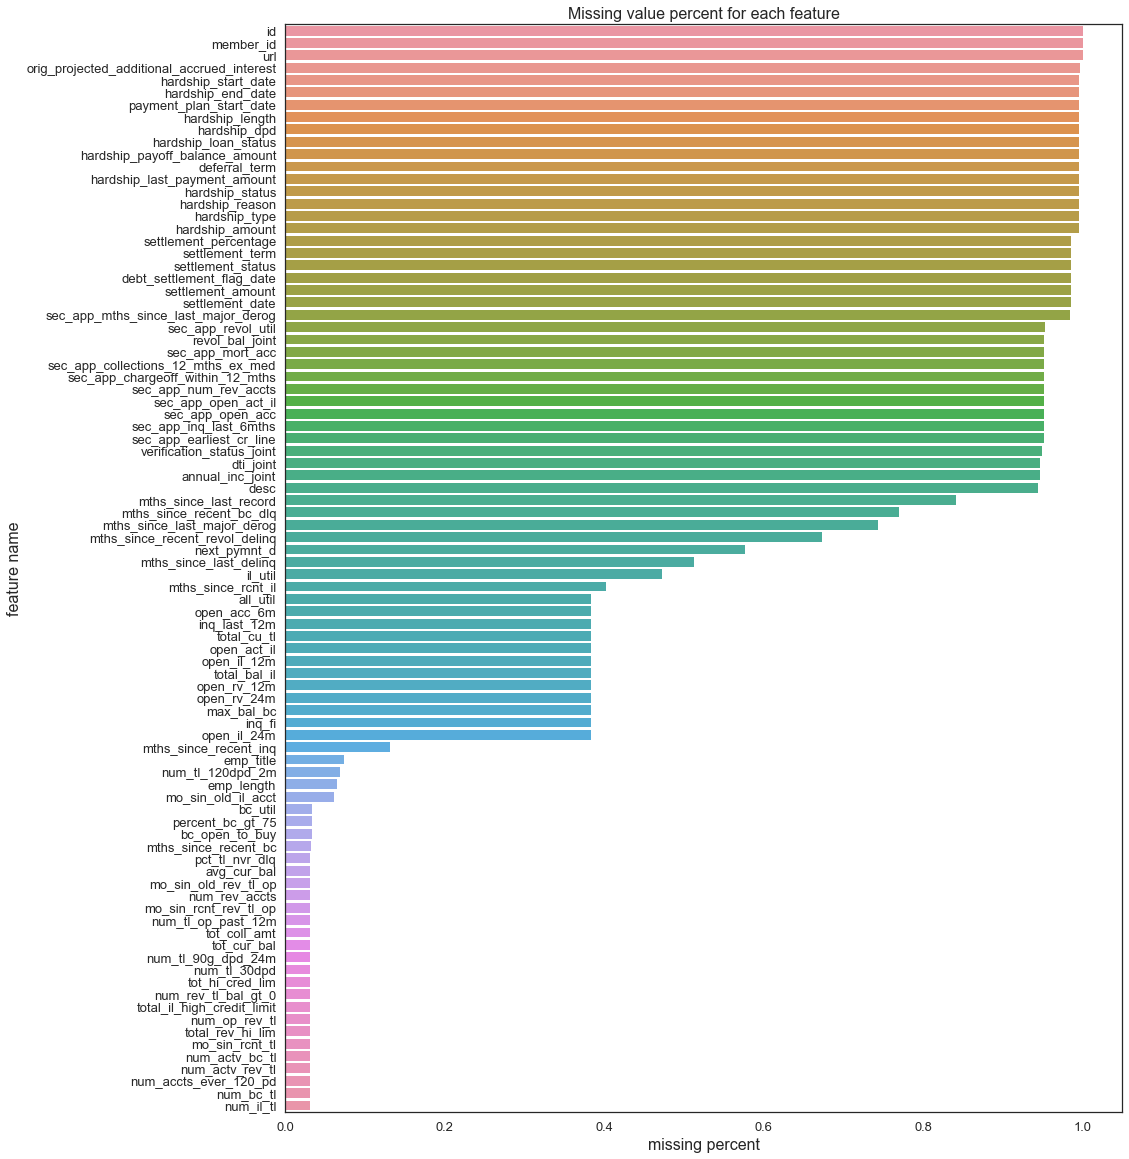

In [12]:
missing_data_count_show = missing_data_count[missing_data_count["Percent"] > 0.03]
sns.set(style="white", context="talk")
f, ax = plt.subplots(figsize=(15, 20))
sns.barplot(x=missing_data_count_show["Percent"], y=missing_data_count_show["feature_name"], ax=ax)
ax.set_title("Missing value percent for each feature", fontsize=16)
ax.set_xlabel("missing percent", fontsize=16)
ax.set_ylabel("feature name", fontsize=16)
plt.show()
plt.close()

#### Missing Values:

* Since the 145 columns in the above graph has been plotted with missing values percent, the following codes will dissect

* each attribute to visualize the missing data and get a better understanding of wanted and unwanted columns

In [13]:
df1 = data.iloc[:, :20]
df2 = data.iloc[:, 20:40]
df3 = data.iloc[:, 40:60]
df4 = data.iloc[:, 60:80]
df5 = data.iloc[:, 80:100]
df6 = data.iloc[:, 100:120]

[]

Text(0.5,1,'First 20 features')

Text(0.5,0,'Features')

Text(0,0.5,'Missing count)')

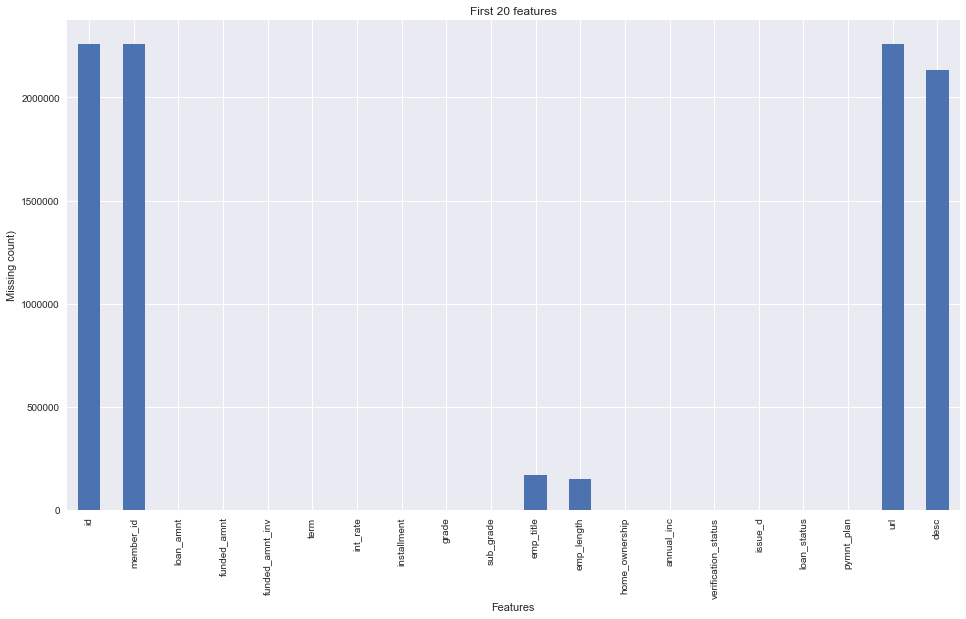

In [54]:
df1.isnull().sum().plot(kind='bar').plot(kind='bar')
plt.title("First 20 features")
plt.xlabel("Features")
plt.ylabel("Missing count)")

#### Based on the visualization desc has almost 100% missing values so we would be dropping it

In [15]:
data.drop(['desc'],axis=1, inplace=True)

[]

Text(0.5,1,'First 20 features')

Text(0.5,0,'Features')

Text(0,0.5,'Missing count)')

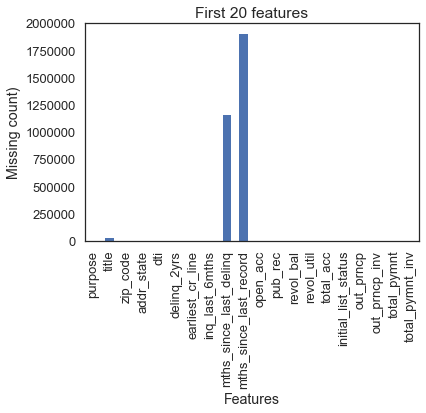

In [16]:
df2.isnull().sum().plot(kind='bar').plot(kind='bar')
plt.title("First 20 features")
plt.xlabel("Features")
plt.ylabel("Missing count)")

In [17]:
data.drop(['mths_since_last_delinq','mths_since_last_record'],axis=1, inplace=True)

[]

Text(0.5,1,'First 20 features')

Text(0.5,0,'Features')

Text(0,0.5,'Missing count)')

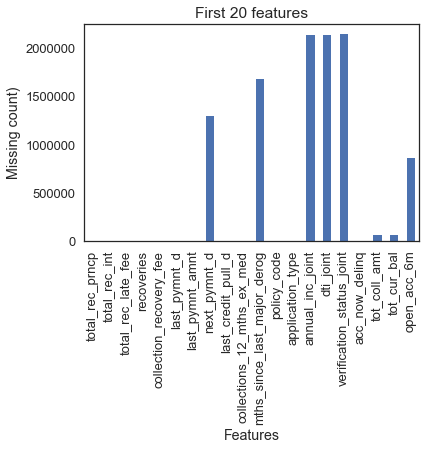

In [18]:
df3.isnull().sum().plot(kind='bar').plot(kind='bar')
plt.title("First 20 features")
plt.xlabel("Features")
plt.ylabel("Missing count)")

In [19]:
data.drop(['dti_joint','annual_inc_joint','verification_status_joint'],axis=1, inplace=True)

[]

Text(0.5,1,'First 20 features')

Text(0.5,0,'Features')

Text(0,0.5,'Missing count)')

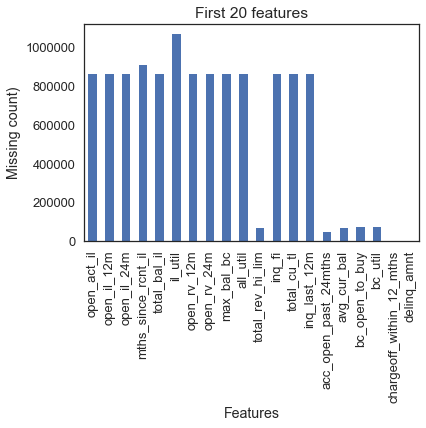

In [20]:
df4.isnull().sum().plot(kind='bar').plot(kind='bar')
plt.title("First 20 features")
plt.xlabel("Features")
plt.ylabel("Missing count)")

[]

Text(0.5,1,'First 20 features')

Text(0.5,0,'Features')

Text(0,0.5,'Missing count)')

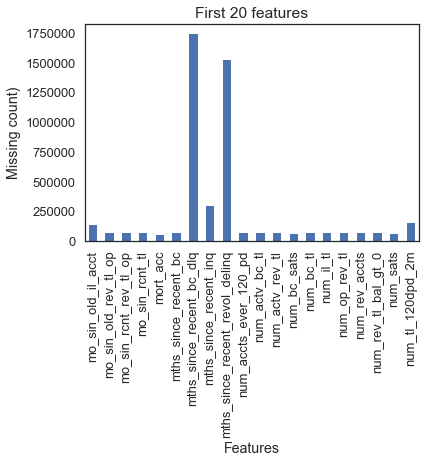

In [21]:
df5.isnull().sum().plot(kind='bar').plot(kind='bar')
plt.title("First 20 features")
plt.xlabel("Features")
plt.ylabel("Missing count)")

In [22]:
data.drop(['mths_since_recent_bc_dlq'],axis=1, inplace=True)

[]

Text(0.5,1,'First 20 features')

Text(0.5,0,'Features')

Text(0,0.5,'Missing count)')

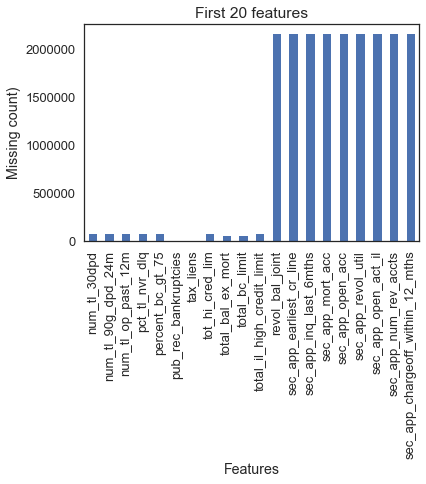

In [23]:
df6.isnull().sum().plot(kind='bar').plot(kind='bar')
plt.title("First 20 features")
plt.xlabel("Features")
plt.ylabel("Missing count)")

In [24]:
data.drop([
'next_pymnt_d',
'mths_since_recent_revol_delinq',
'mths_since_last_major_derog',
'sec_app_collections_12_mths_ex_med',
'sec_app_num_rev_accts',
'sec_app_open_act_il',
'sec_app_open_acc',
'sec_app_mort_acc',
'sec_app_chargeoff_within_12_mths',
'sec_app_earliest_cr_line',
'revol_bal_joint',
'sec_app_inq_last_6mths',
'sec_app_revol_util',
'sec_app_mths_since_last_major_derog',
'settlement_date',
'settlement_status',
'settlement_amount',
'debt_settlement_flag_date',
'settlement_term',
'settlement_percentage',
'hardship_status',
'hardship_type',
'hardship_last_payment_amount',
'hardship_payoff_balance_amount',
'hardship_reason',
'hardship_dpd',
'hardship_loan_status',
'payment_plan_start_date',
'hardship_end_date',
'hardship_start_date',
'hardship_amount',
'deferral_term',
'hardship_length',
'orig_projected_additional_accrued_interest',
'url',
'member_id',
'id'
]
          ,axis=1, inplace=True)


In [25]:
data.shape

(2260668, 101)

#### Returns the data frame of the repective data types

In [26]:
numb_cols = data.select_dtypes(include=("int64","float64"))
cat_cols = data.select_dtypes(include=("object"))

In [ ]:
unique_val=data.nunique()

In [ ]:
cat_cols.nunique()

** After assessing the categorical columns, attributes such as verification, status,title,disbursement_method,**
**debt_settlement_flag,hardship_flag,initial_list_status,last_credit_pull_d,last_pymnt_d doesn't prove useful for our analysis**
**Hence, dropping these values**


In [27]:
data.drop(['verification_status','disbursement_method','debt_settlement_flag','hardship_flag','last_credit_pull_d',
           'last_pymnt_d','initial_list_status','earliest_cr_line'
],axis=1, inplace=True)

In [28]:
data.shape

(2260668, 93)

In [29]:
cat_cols.drop(['verification_status','disbursement_method','debt_settlement_flag','hardship_flag','last_credit_pull_d',
           'last_pymnt_d','initial_list_status','earliest_cr_line'
],axis=1, inplace=True)

#### Convert term column to int

In [30]:
print(data['term'].unique())
data['term'] = data['term'].apply(lambda x : 36 if x==' 36 months' else 60)
print(data['term'].unique())

[' 36 months' ' 60 months']
[36 60]


In [31]:
pd.options.display.max_rows = 4000

In [ ]:
numb_cols.nunique()

In [32]:
numb_cols['is_score_chased'] = np.where(numb_cols['loan_amnt']==numb_cols['funded_amnt'], 
                                           'yes', 'no')

In [33]:
numb_cols[['is_score_chased','loan_amnt','funded_amnt']]

,is_score_chased,loan_amnt,funded_amnt
0,yes,2500,2500
1,yes,30000,30000
2,yes,5000,5000
3,yes,4000,4000
4,yes,30000,30000
5,yes,5550,5550
6,yes,2000,2000
7,yes,6000,6000
8,yes,5000,5000
9,yes,6000,6000


In [49]:
Data_dict.set_index("LoanStatNew", inplace=True)
Data_dict.head()    

,Description
LoanStatNew,
acc_now_delinq,The number of accounts on which the borrower i...
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan...
all_util,Balance to credit limit on all trades
annual_inc,The self-reported annual income provided by th...


In [50]:
Data_dict.loc[['loan_amnt',
'funded_amnt',
'funded_amnt_inv',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'open_acc',
'pub_rec',
'revol_bal',
'revol_util',
'total_acc',
'out_prncp',
'out_prncp_inv',
'total_pymnt',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'recoveries',
'collection_recovery_fee',
'last_pymnt_amnt',
'collections_12_mths_ex_med',
'policy_code',
'acc_now_delinq',
'tot_coll_amt',
'tot_cur_bal',
'open_acc_6m',
'open_act_il',
'open_il_12m',
'open_il_24m',
'mths_since_rcnt_il',
'total_bal_il',
'il_util',
'open_rv_12m',
'open_rv_24m',
'max_bal_bc',
'all_util',
'total_rev_hi_lim',
'inq_fi',
'total_cu_tl',
'inq_last_12m',
'acc_open_past_24mths',
'avg_cur_bal',
'bc_open_to_buy',
'bc_util',
'chargeoff_within_12_mths',
'delinq_amnt',
'mo_sin_old_il_acct',
'mo_sin_old_rev_tl_op',
'mo_sin_rcnt_rev_tl_op',
'mo_sin_rcnt_tl',
'mort_acc',
'mths_since_recent_bc',
'mths_since_recent_inq',
'num_accts_ever_120_pd',
'num_actv_bc_tl',
'num_actv_rev_tl',
'num_bc_sats',
'num_bc_tl',
'num_il_tl',
'num_op_rev_tl',
'num_rev_accts',
'num_rev_tl_bal_gt_0',
'num_sats',
'num_tl_120dpd_2m',
'num_tl_30dpd',
'num_tl_90g_dpd_24m',
'num_tl_op_past_12m',
'pct_tl_nvr_dlq',
'percent_bc_gt_75',
'pub_rec_bankruptcies',
'tax_liens',
'tot_hi_cred_lim',
'total_bal_ex_mort',
'total_bc_limit',
'total_il_high_credit_limit'

]]

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
funded_amnt,The total amount committed to that loan at tha...
funded_amnt_inv,The total amount committed by investors for th...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
annual_inc,The self-reported annual income provided by th...
dti,A ratio calculated using the borrower’s total ...
delinq_2yrs,The number of 30+ days past-due incidences of ...
inq_last_6mths,The number of inquiries in past 6 months (excl...


**Based on the above data dictionary, we are eliminating the below attributes based on the reason as stated**

In [35]:
data.drop(['acc_now_delinq',
'bc_open_to_buy',
'bc_util',

'collection_recovery_fee',
'collections_12_mths_ex_med',

'funded_amnt',
'funded_amnt_inv',
'il_util',
'inq_fi',
'inq_last_12m',
'inq_last_6mths',
'installment',
'last_pymnt_amnt',
'max_bal_bc',
'mo_sin_old_il_acct',
'mo_sin_old_rev_tl_op',
'mo_sin_rcnt_rev_tl_op',
'mo_sin_rcnt_tl',
'mths_since_rcnt_il',
'mths_since_recent_bc',
'mths_since_recent_inq',
'num_accts_ever_120_pd',
'num_sats',
'out_prncp',
'out_prncp_inv',
'pct_tl_nvr_dlq',
'percent_bc_gt_75',
'policy_code',
'recoveries',
'tot_coll_amt',
'tot_cur_bal',
'total_pymnt',
'total_pymnt_inv',
'total_rec_int',
'total_rec_late_fee',
'total_rec_prncp'
          ],axis=1,inplace=True)

In [36]:
data.shape

(2260668, 57)

In [37]:
numb_cols.drop(['acc_now_delinq',
'bc_open_to_buy',
'bc_util',
'chargeoff_within_12_mths',
'collection_recovery_fee',
'collections_12_mths_ex_med',
'delinq_2yrs',
'funded_amnt',
'funded_amnt_inv',
'il_util',
'inq_fi',
'inq_last_12m',
'inq_last_6mths',
'installment',
'last_pymnt_amnt',
'max_bal_bc',
'mo_sin_old_il_acct',
'mo_sin_old_rev_tl_op',
'mo_sin_rcnt_rev_tl_op',
'mo_sin_rcnt_tl',
'mths_since_rcnt_il',
'mths_since_recent_bc',
'mths_since_recent_inq',
'num_accts_ever_120_pd',
'num_sats',
'out_prncp',
'out_prncp_inv',
'pct_tl_nvr_dlq',
'percent_bc_gt_75',
'policy_code',
'recoveries',
'tot_coll_amt',
'tot_cur_bal',
'total_pymnt',
'total_pymnt_inv',
'total_rec_int',
'total_rec_late_fee',
'total_rec_prncp'
          ],axis=1,inplace=True)

In [ ]:
numb_cols.nunique()

In [38]:
missing = round(100*(numb_cols.isnull().sum()/len(numb_cols)), 2)
missing[missing != 0]

dti                            0.08
revol_util                     0.08
open_acc_6m                   38.31
open_act_il                   38.31
open_il_12m                   38.31
open_il_24m                   38.31
total_bal_il                  38.31
open_rv_12m                   38.31
open_rv_24m                   38.31
all_util                      38.32
total_rev_hi_lim               3.11
total_cu_tl                   38.31
acc_open_past_24mths           2.21
avg_cur_bal                    3.11
mort_acc                       2.21
num_actv_bc_tl                 3.11
num_actv_rev_tl                3.11
num_bc_sats                    2.59
num_bc_tl                      3.11
num_il_tl                      3.11
num_op_rev_tl                  3.11
num_rev_accts                  3.11
num_rev_tl_bal_gt_0            3.11
num_tl_120dpd_2m               6.80
num_tl_30dpd                   3.11
num_tl_90g_dpd_24m             3.11
num_tl_op_past_12m             3.11
pub_rec_bankruptcies        

In [39]:
data.tax_liens.unique()

array([ 0.,  1.,  2.,  4.,  6.,  3.,  5.,  8.,  7., 15.,  9., 10., 13.,
       21., 52., 19., 11., 12., 23., 45., 22., 24., 27., 18., 61., 16.,
       30., 46., 14., 20., 37., 17., 25., 85., 28., 29., 44., 48., 53.,
       39., 63., 34., nan])

In [40]:
data.pub_rec.unique()

array([ 1.,  0.,  3.,  2.,  4.,  5.,  6.,  8.,  7., 15.,  9., 10., 13.,
       24., 52., 19., 11., 12., 21., 14., 45., 25., 28., 61., 17., 31.,
       20., 47., 16., 46., 22., 37., 23., 26., 86., 18., 49., 32., 44.,
       54., 40., 63., 34., nan])

In [41]:
data.pub_rec_bankruptcies.unique()

array([ 1.,  0.,  3.,  2.,  4.,  5.,  6.,  7.,  8.,  9., 11., 12., nan])

In [42]:
data.pub_rec_bankruptcies.value_counts()

0.0     1987383
1.0      258444
2.0       10518
3.0        2131
4.0         541
5.0         188
6.0          60
7.0          23
8.0          10
9.0           3
12.0          1
11.0          1
Name: pub_rec_bankruptcies, dtype: int64

In [43]:
nulls_numb = pd.DataFrame(round(numb_cols.isnull().sum()/len(numb_cols.index)*100,2),columns=['null_percent'])
nulls_numb[nulls_numb['null_percent']!=0.00].sort_values('null_percent',ascending=False)

,null_percent
all_util,38.32
open_acc_6m,38.31
open_act_il,38.31
open_il_12m,38.31
open_il_24m,38.31
total_bal_il,38.31
open_rv_12m,38.31
open_rv_24m,38.31
total_cu_tl,38.31
num_tl_120dpd_2m,6.80


In [44]:
nulls_numb[nulls_numb['null_percent']==0.00].sort_values('null_percent',ascending=False)

,null_percent
loan_amnt,0.0
int_rate,0.0
annual_inc,0.0
open_acc,0.0
pub_rec,0.0
revol_bal,0.0
total_acc,0.0
delinq_amnt,0.0
tax_liens,0.0
is_score_chased,0.0


** Exploring the interest rate which is our target variable in this analysis**

In [45]:
# convert int_rate to float
print(data['int_rate'].head(2))


0    13.56
1    18.94
Name: int_rate, dtype: float64


In [46]:
data["int_rate"].describe().apply(lambda x: format(x, 'f'))

count    2260668.000000
mean          13.092913
std            4.832114
min            5.310000
25%            9.490000
50%           12.620000
75%           15.990000
max           30.990000
Name: int_rate, dtype: object

In [47]:
float_cols = numb_cols.select_dtypes(include=("float64"))

In [48]:
data.shape

(2260668, 57)

>There are total 55 features in the data and our target variable is interest rate column. 

>>Our target variabel (interest rate) has following statistics:


>>Minimum value: 5.310000


>>Maximum Value: 30.99 


>>Mean:  5.310000


>>And Standard Deviation of 4.832114

##  Univariate Analysis

**Continuous Variables**
**In case of continuous variables, we need to understand the central tendency and spread of the variable.These are measured using various statistical metrics**
**visualization methods such as Boxplot,Histogram/Distribution Plot **

**Categorical Variables**

**For categorical variables, we’ll use frequency table to understand distribution of each category It can be be measured using two metrics,Count and Count% against each category. Countplot or Bar chart can be used as visualization.**

#### 1. Interest rate

Text(0.5,0,'Loan Interest Rate')

Text(0,0.5,'Count')

Text(0.5,1,'Interest Rate Distribuition')

Text(0,56360,'2.49%')

Text(1,67997,'3.01%')

Text(2,152617,'6.75%')

Text(3,181721,'8.04%')

Text(4,111010,'4.91%')

Text(5,170663,'7.55%')

Text(6,200819,'8.88%')

Text(7,158845,'7.03%')

Text(8,203352,'9.00%')

Text(9,220372,'9.75%')

Text(10,121253,'5.36%')

Text(11,131856,'5.83%')

Text(12,89613,'3.96%')

Text(13,100365,'4.44%')

Text(14,70618,'3.12%')

Text(15,59159,'2.62%')

Text(16,36504,'1.61%')

Text(17,26844,'1.19%')

Text(18,19094,'0.84%')

Text(19,20862,'0.92%')

Text(20,17479,'0.77%')

Text(21,18673,'0.83%')

Text(22,6998,'0.31%')

Text(23,1524,'0.07%')

Text(24,5123,'0.23%')

Text(25,3933,'0.17%')

Text(26,7095,'0.31%')

(0, 242405.90000000002)

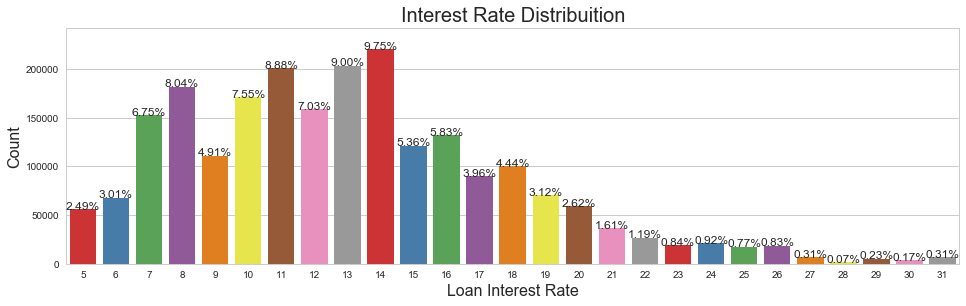

In [56]:
total = len(data)
data['int_round'] = data['int_rate'].round(0).astype(int)
plt.subplot(212)
g1 = sns.countplot(x="int_round", data=data, 
                  palette='Set1')
g1.set_xlabel("Loan Interest Rate", fontsize=16)
g1.set_ylabel("Count", fontsize=16)
g1.set_title("Interest Rate Distribuition", fontsize=20)
sizes=[] # Get highest values in y
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g1.set_ylim(0, max(sizes) * 1.10) # set y limit based on highest heights

plt.subplots_adjust(hspace = 0.4,top = 1.0)

plt.show()

Text(0.5, 1.0, 'Int rate distribution')

Text(0.5, 1.0, 'Int rate distribution')

Text(0.5, 0, 'Int rate')

Text(0, 0.5, 'Int rate')

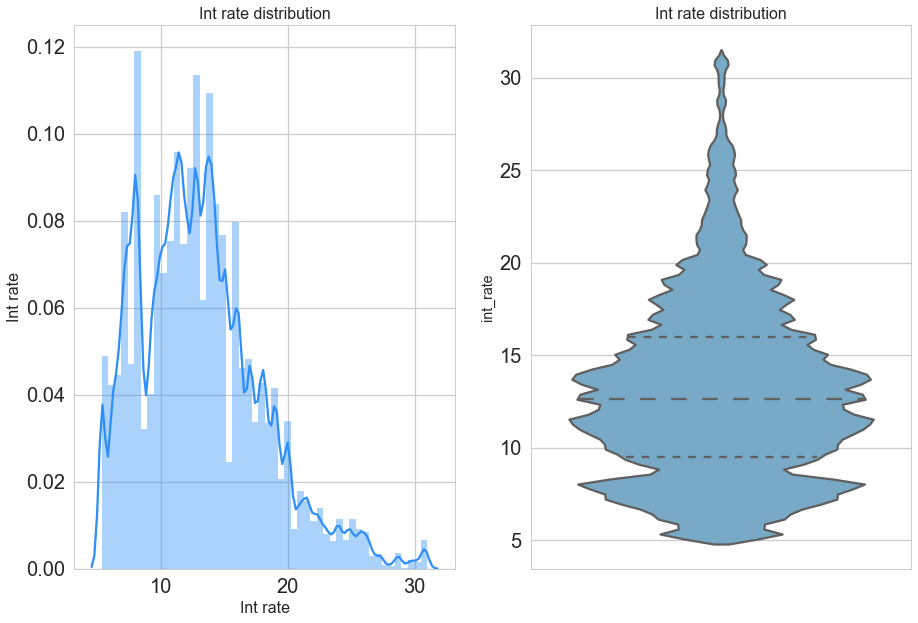

In [65]:
sns.set_style("whitegrid")
f_int_rate, ax_int_rate = plt.subplots(1, 2, figsize=(15, 10))
sns.distplot(data["int_rate"], ax=ax_int_rate[0], color="#2F8FF7")
sns.violinplot(y=data["int_rate"], ax=ax_int_rate[1], inner="quartile", palette="Blues")
ax_int_rate[0].set_title("Int rate distribution", fontsize=16)
ax_int_rate[1].set_title("Int rate distribution", fontsize=16)
ax_int_rate[0].set_xlabel("Int rate", fontsize=16)
ax_int_rate[0].set_ylabel("Int rate", fontsize=16)
plt.show()
plt.close()

#### 2. Loan Amount

<Figure size 1008x720 with 0 Axes>

Text(0.5,0,'Loan Amount Value')

Text(0,0.5,'Frequency')

Text(0.5,1,'Loan Amount Distribuition')

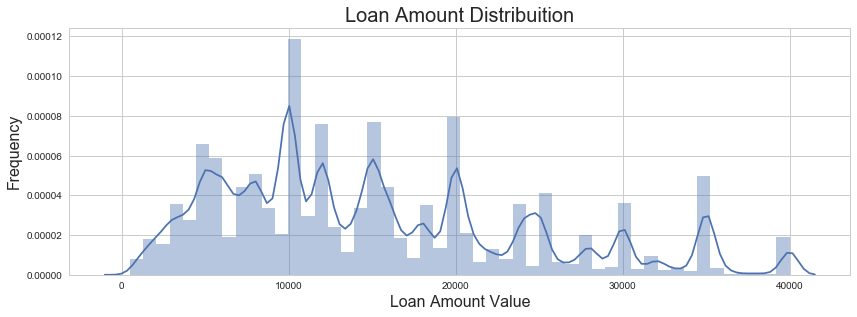

In [57]:
plt.figure(figsize=(14,10))
# Loan Amt plot
plt.subplot(211)
g = sns.distplot(data["loan_amnt"])
g.set_xlabel("Loan Amount Value", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)
g.set_title("Loan Amount Distribuition", fontsize=20)

### 3. Annual Income

In [58]:
data["annual_inc"].describe().apply(lambda x: format(x, 'f'))

count      2260664.000000
mean         77992.428687
std         112696.199574
min              0.000000
25%          46000.000000
50%          65000.000000
75%          93000.000000
max      110000000.000000
Name: annual_inc, dtype: object

Text(0.5,1,'dti distribution')

Text(0.5,1,'dti distribution')

Text(0.5,0,'dti')

Text(0,0.5,'dti')

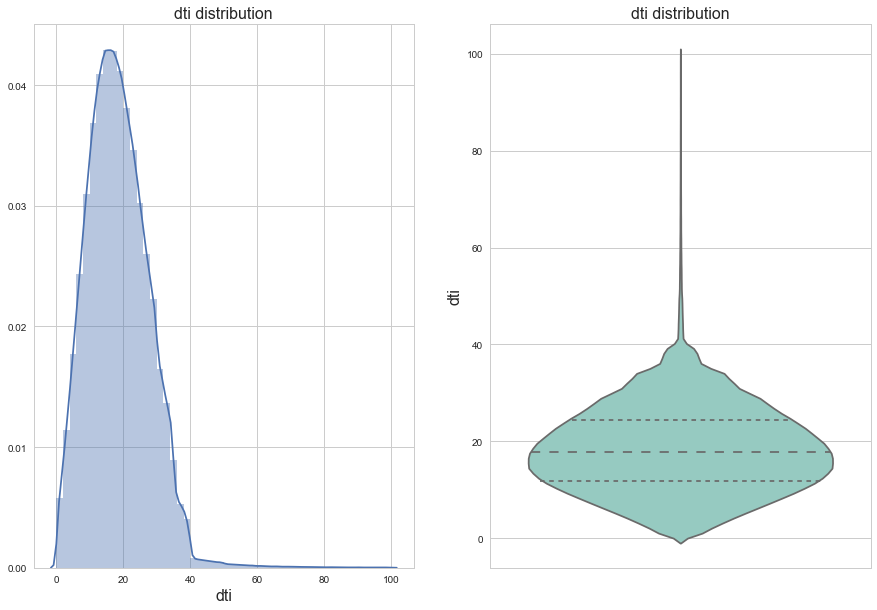

In [59]:
loan_data_dti = data[data["dti"] <= 100.0]
loan_data_dti = loan_data_dti[loan_data_dti["dti"] > 0.0]
sns.set_style("whitegrid")
f_dti, ax_dti = plt.subplots(1,2, figsize=(15, 10))
sns.distplot(loan_data_dti["dti"], ax=ax_dti[0])
sns.violinplot(y=loan_data_dti["dti"], ax=ax_dti[1], inner="quartile", palette="Set3")
ax_dti[0].set_title("dti distribution", fontsize=16)
ax_dti[1].set_title("dti distribution", fontsize=16)
ax_dti[0].set_xlabel("dti", fontsize=16)
ax_dti[1].set_ylabel("dti", fontsize=16)
plt.show()
plt.close()

## Bivariate Analysis

**Bivariate/Multivariate Analysis finds out the relationship between two/two or more variables.We can perform Bivariate/Multivariate analysis**
**for any combination of categorical and continuous variables.**
**The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous**

In [60]:
data['year'] = pd.DatetimeIndex(data['issue_d']).year

In [61]:
data['year']

0          2018
1          2018
2          2018
3          2018
4          2018
5          2018
6          2018
7          2018
8          2018
9          2018
10         2018
11         2018
12         2018
13         2018
14         2018
15         2018
16         2018
17         2018
18         2018
19         2018
20         2018
21         2018
22         2018
23         2018
24         2018
25         2018
26         2018
27         2018
28         2018
29         2018
30         2018
31         2018
32         2018
33         2018
34         2018
35         2018
36         2018
37         2018
38         2018
39         2018
40         2018
41         2018
42         2018
43         2018
44         2018
45         2018
46         2018
47         2018
48         2018
49         2018
50         2018
51         2018
52         2018
53         2018
54         2018
55         2018
56         2018
57         2018
58         2018
59         2018
60         2018
61         2018
62      

In [62]:
pdf=data.groupby(['grade','year'])['loan_amnt'].agg({'Average':['mean']})  
pdf

Average
                    mean
grade year              
A     2007   5015.384615
      2008   6234.512579
      2009   7232.481297
      2010   8771.855124
      2011   8977.632951
      2012  11143.649665
      2013  15316.723231
      2014  14495.756481
      2015  14691.902340
      2016  14306.700707
      2017  13920.947764
      2018  15775.350651
B     2007   8337.755102
      2008   9174.705387
      2009  10861.920415
      2010  10917.636290
      2011  11371.835491
      2012  11869.462906
      2013  13507.537515
      2014  13631.910471
      2015  14251.806455
      2016  13402.232886
      2017  13818.853050
      2018  16196.126340
C     2007   8275.709220
      2008   8840.086207
      2009   9779.247033
      2010  10057.850861
      2011  12201.775748
      2012  12919.494737
      2013  14871.017989
      2014  14475.215954
      2015  14745.592285
      2016  14688.827188
      2017  15329.079053
      2018  16177.995467
D     2007   8005.555556
      2008   8972.136038
      2009  10648.867809
      2010  10985.676393
      2011  13348.238555
      2012  15548.590059
      2013  13789.743060
      2014  16038.041380
      2015  15947.183739
      2016  16049.493900
      2017  15744.921530
      2018  15905.817136
E     2007   8138.250000
      2008   8988.859649
      2009  11899.918831
      2010  12257.718295
      2011  17867.294422
      2012  22064.701727
      2013  17808.795121
      2014  17171.415437
      2015  18472.726622
      2016  17975.848607
      2017  16891.541875
      2018  15305.560977
F     2007  11850.961538
      2008  11137.612613
      2009  12649.761905
      2010  14694.694534
      2011  20169.217452
      2012  24983.669202
      2013  19220.868427
      2014  16760.143821
      2015  20090.274524
      2016  19205.212128
      2017  19001.662128
      2018  19027.409449
G     2007  10847.857143
      2008  11653.779070
      2009  11930.000000
      2010  18022.744361
      2011  21260.837438
      2012  26264.463602
      2013  22665.075231
      2014  19750.964392
      2015  20427.838025
      2016  19498.549588
      2017  20916.647382
      2018  19741.505216

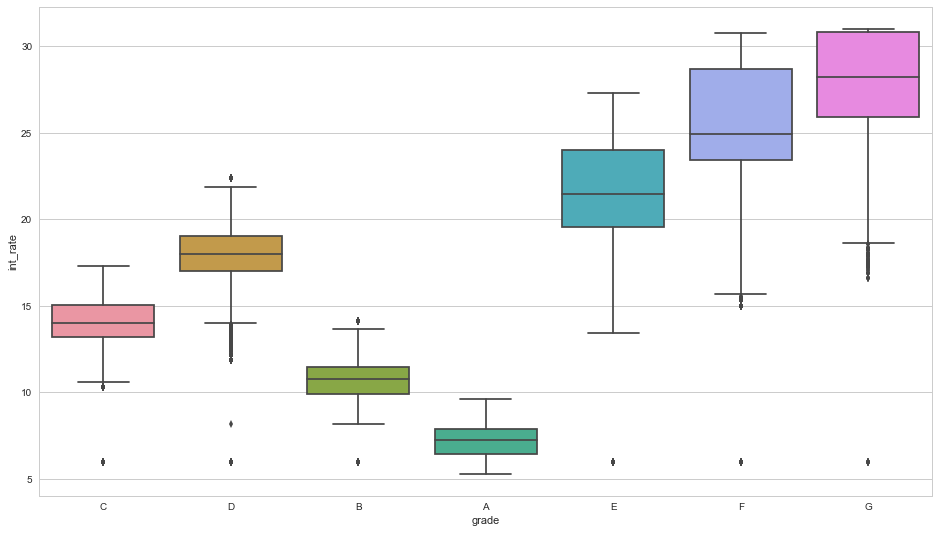

In [63]:
sns.set_style("whitegrid") 
  
sns.boxplot(x = 'grade', y = 'int_rate', data = data) 
#data.boxplot(by ='grade', column =['int_rate'], grid = False) 

<Figure size 1080x432 with 0 Axes>

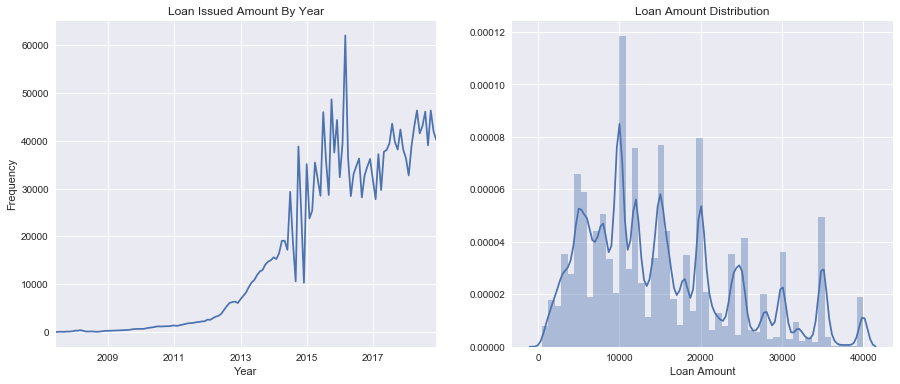

In [64]:
data['issue_d_year'] = pd.to_datetime(data['issue_d'])
year_dist = data.groupby(['issue_d_year']).size()

plt.figure(figsize=(15,6))
sns.set()

ax1 = plt.subplot(1, 2, 1)
ax1 = year_dist.plot()
ax1 = plt.title('Loan Issued Amount By Year')
ax1 = plt.xlabel('Year')
ax1 = plt.ylabel('Frequency')

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.distplot(data['loan_amnt'])
ax2 = plt.title('Loan Amount Distribution')
ax2 = plt.xlabel('Loan Amount')

2260668


[Text(0,0,'Current'),
 Text(0,0,'Fully Paid'),
 Text(0,0,'Late (31-120 days)'),
 Text(0,0,'In Grace Period'),
 Text(0,0,'Charged Off'),
 Text(0,0,'Late (16-30 days)'),
 Text(0,0,'Default'),
 Text(0,0,'Does not meet the credit policy. Status:Fully Paid'),
 Text(0,0,'Does not meet the credit policy. Status:Charged Off')]

Text(0.5,0,'Loan Status Categories')

Text(0,0.5,'Count')

Text(0.5,1,'Loan Status Types Distribution')

Text(0,919698,'40.68%')

Text(1,1.04196e+06,'46.09%')

Text(2,21900,'0.97%')

Text(3,8955,'0.40%')

Text(4,261658,'11.57%')

Text(5,3740,'0.17%')

Text(6,34,'0.00%')

Text(7,1991,'0.09%')

Text(8,764,'0.03%')

(0, 1146147.2000000002)

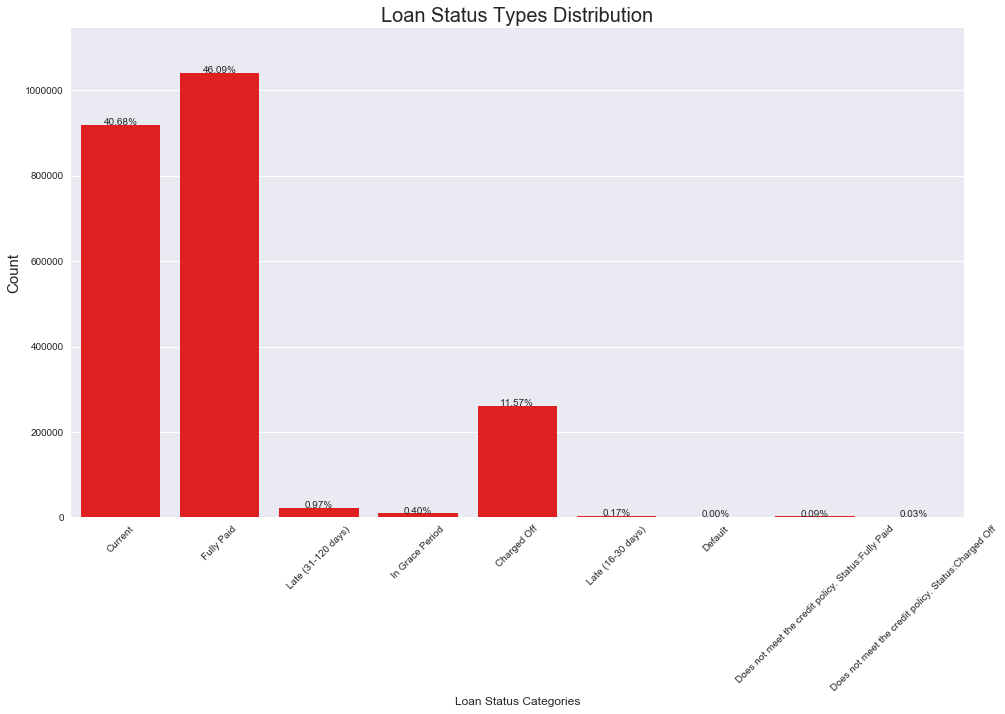

In [65]:
total = len(data)
print(total)
#plt.figure(figsize = (14,6))

g = sns.countplot(x="loan_status", data=data, 
                  color='red')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    #print(p)
    height = p.get_height()
    #print(height)
    sizes.append(height)
    #print(sizes)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

#### Purpose
A category provided by the borrower for the loan request.

As it a categorical feature that says what's the purpose to the loan, would be interesting to start by Purpose

Text(0.5,1,'Client Purposes for Loan Credit')

Text(0.5,0,'Purpose Titles')

Text(0,0.5,'Count')

Text(0,1.27788e+06,'56.53%')

Text(1,516974,'22.87%')

Text(2,14139,'0.63%')

Text(3,24016,'1.06%')

Text(4,139443,'6.17%')

Text(5,15528,'0.69%')

Text(6,150460,'6.66%')

Text(7,24692,'1.09%')

Text(8,50448,'2.23%')

Text(9,27491,'1.22%')

Text(10,1448,'0.06%')

Text(11,15406,'0.68%')

Text(12,2358,'0.10%')

Text(13,427,'0.02%')

(0, 1405664.7000000002)

[Text(0,0,'debt_consolidation'),
 Text(0,0,'credit_card'),
 Text(0,0,'house'),
 Text(0,0,'car'),
 Text(0,0,'other'),
 Text(0,0,'vacation'),
 Text(0,0,'home_improvement'),
 Text(0,0,'small_business'),
 Text(0,0,'major_purchase'),
 Text(0,0,'medical'),
 Text(0,0,'renewable_energy'),
 Text(0,0,'moving'),
 Text(0,0,'wedding'),
 Text(0,0,'educational')]

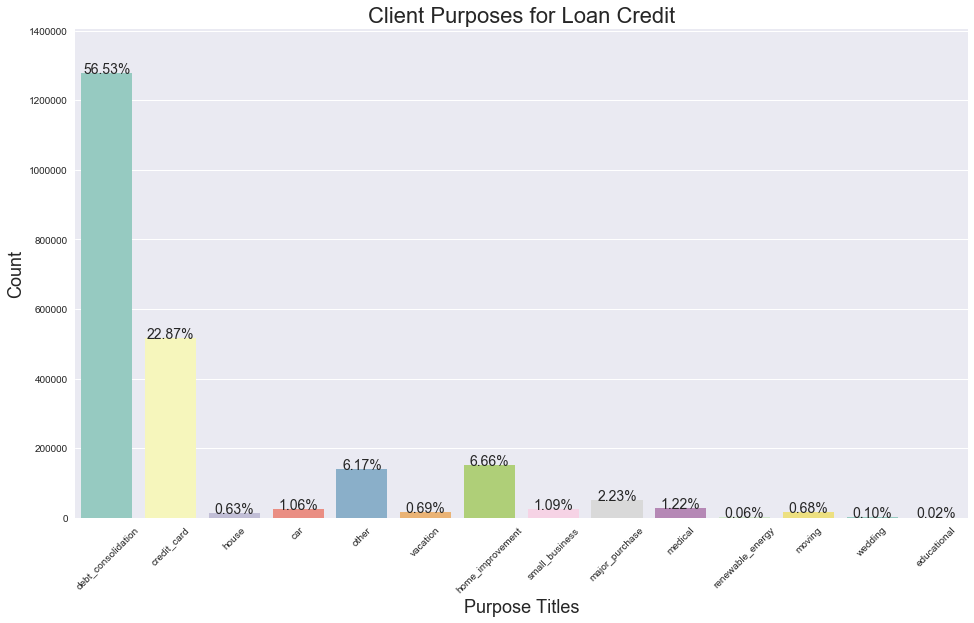

In [66]:
g = sns.countplot(x='purpose', data=data, 
                  palette="Set3")
g.set_title("Client Purposes for Loan Credit", fontsize=22)
g.set_xlabel("Purpose Titles", fontsize=18)
g.set_ylabel('Count', fontsize=18)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.10)
g.set_xticklabels(g.get_xticklabels(),
                  rotation=45)

plt.show()


<h4> The top 3 purposes are:</a></h4>

* 56.5% of the Loans are to Debt Consolidation

* 22.87% are to pay Credit Card

* 67% to Home Improvement and many others purposes that sums 13.94%

** LOAN AMOUNT and INTEREST RATE Distributions**
** Loan Amount - The listed amount of the loan applied for by the borrower.**
** If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.**

<Figure size 1008x720 with 0 Axes>

Text(0.5,0,'Loan Amount Value')

Text(0,0.5,'Frequency')

Text(0.5,1,'Loan Amount Distribuition')

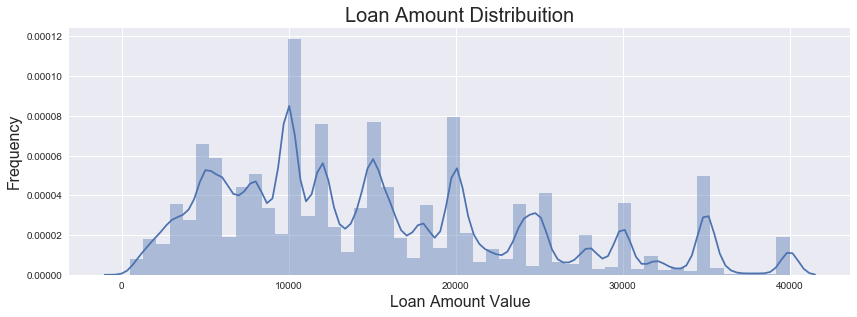

In [67]:
data['int_round'] = data['int_rate'].round(0).astype(int)
plt.figure(figsize=(14,10))
# Loan Amt plot
plt.subplot(211)
g = sns.distplot(data["loan_amnt"])
g.set_xlabel("Loan Amount Value", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)
g.set_title("Loan Amount Distribuition", fontsize=20)

debt_consolidation    57.0
credit_card           23.0
home_improvement       7.0
other                  6.0
major_purchase         2.0
medical                1.0
small_business         1.0
car                    1.0
vacation               1.0
moving                 1.0
house                  1.0
wedding                0.0
renewable_energy       0.0
educational            0.0
Name: purpose, dtype: float64 2


<Figure size 720x720 with 0 Axes>

Text(0.5,1,'Purpose wise loan distribtion')

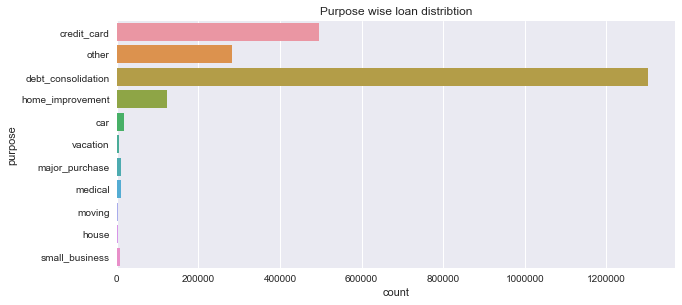

In [68]:
print(round(data.purpose.value_counts(normalize=True)*100),2)
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('Purpose wise loan distribtion')
sns.countplot(y=data.loan_amnt, data=data.purpose)

** Debt Consolidation**

** Exploring how much of debt consolidation was charged off and paid **

In [70]:
print(data.loan_status.value_counts(normalize=True))
df_fp=data.loc[(data.loan_status=='Fully Paid'),]
df_co=data.loc[(data.loan_status=='Charged Off'),]

Fully Paid                                             0.460904
Current                                                0.406824
Charged Off                                            0.115742
Late (31-120 days)                                     0.009686
In Grace Period                                        0.003960
Late (16-30 days)                                      0.001653
Does not meet the credit policy. Status:Fully Paid     0.000879
Does not meet the credit policy. Status:Charged Off    0.000337
Default                                                0.000014
Name: loan_status, dtype: float64


**Correlation**

In [73]:
int_col = data.select_dtypes(include=("int64"))

In [74]:
float_col=data.select_dtypes(include=("float64"))

In [75]:
int_corr=int_col.corr()

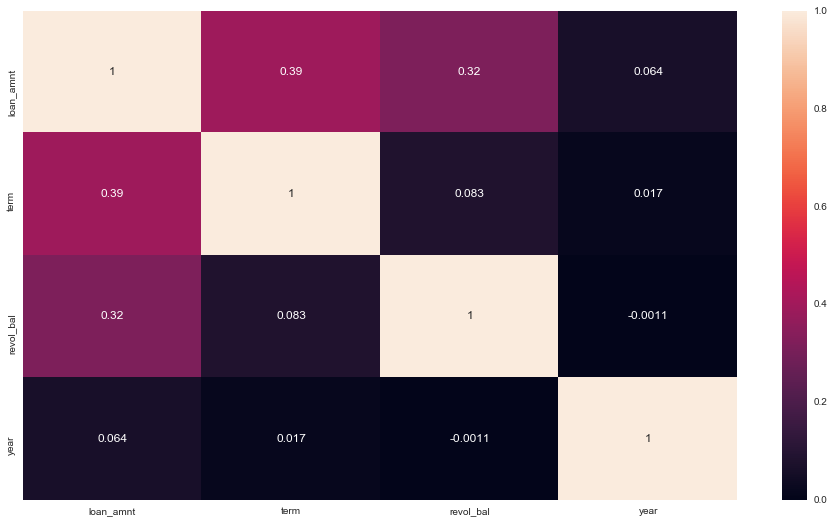

In [76]:
sns.heatmap(int_corr, 
        xticklabels=int_corr.columns,
        yticklabels=int_corr.columns,annot=True)

In [77]:
float_cor=float_col.corr()

In [78]:
df1 = float_col.iloc[:, :10]
df1_cor=df1.corr()


In [79]:
print(df1)

         int_rate  annual_inc     dti  delinq_2yrs  open_acc  pub_rec  \
0           13.56    55000.00   18.24          0.0       9.0      1.0   
1           18.94    90000.00   26.52          0.0      13.0      1.0   
2           17.97    59280.00   10.51          0.0       8.0      0.0   
3           18.94    92000.00   16.74          0.0      10.0      0.0   
4           16.14    57250.00   26.35          0.0      12.0      0.0   
5           15.02   152500.00   37.94          0.0      18.0      0.0   
6           17.97    51000.00    2.40          0.0       1.0      0.0   
7           13.56    65000.00   30.10          0.0      19.0      0.0   
8           17.97    53580.00   21.16          0.0       8.0      0.0   
9           14.47   300000.00   17.43          1.0      38.0      0.0   
10          22.35    50000.00   15.94          1.0       6.0      0.0   
11          11.31    70000.00   22.01          0.0      10.0      0.0   
12           8.19    65000.00   23.60          0.0 

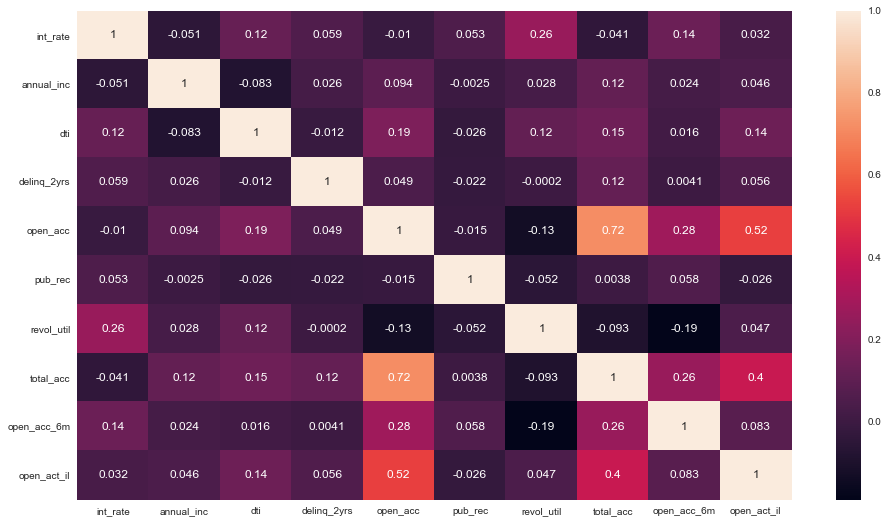

In [80]:
sns.heatmap(df1_cor, 
        xticklabels=df1_cor.columns,
        yticklabels=df1_cor.columns,annot=True)

In [81]:
df2 = float_col.iloc[:, 10:20]
df2_cor=df2.corr()

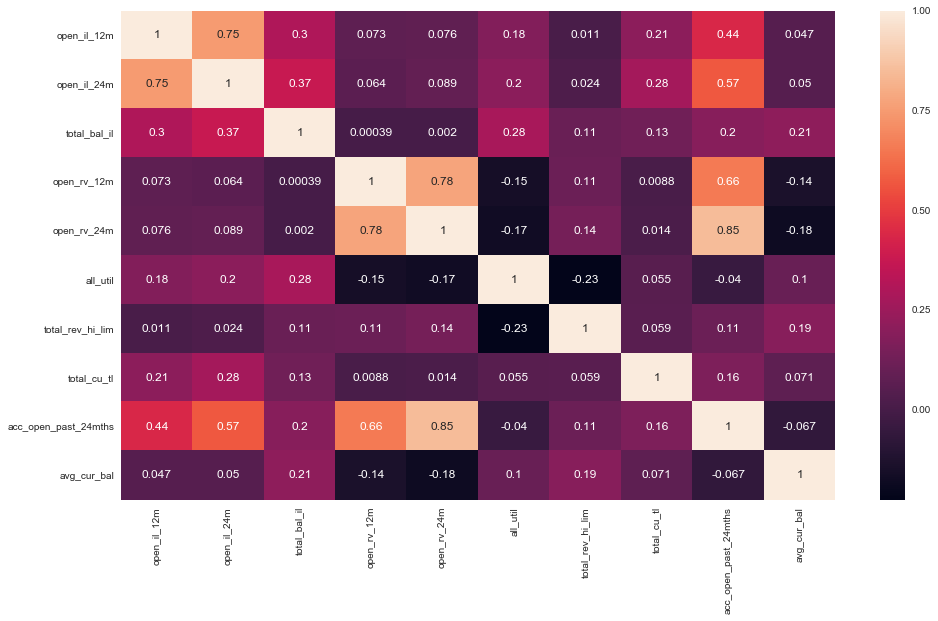

In [82]:
sns.heatmap(df2_cor, 
        xticklabels=df2_cor.columns,
        yticklabels=df2_cor.columns,annot=True)

In [83]:
df3 = float_col.iloc[:, 20:30]
df3_cor=df3.corr()

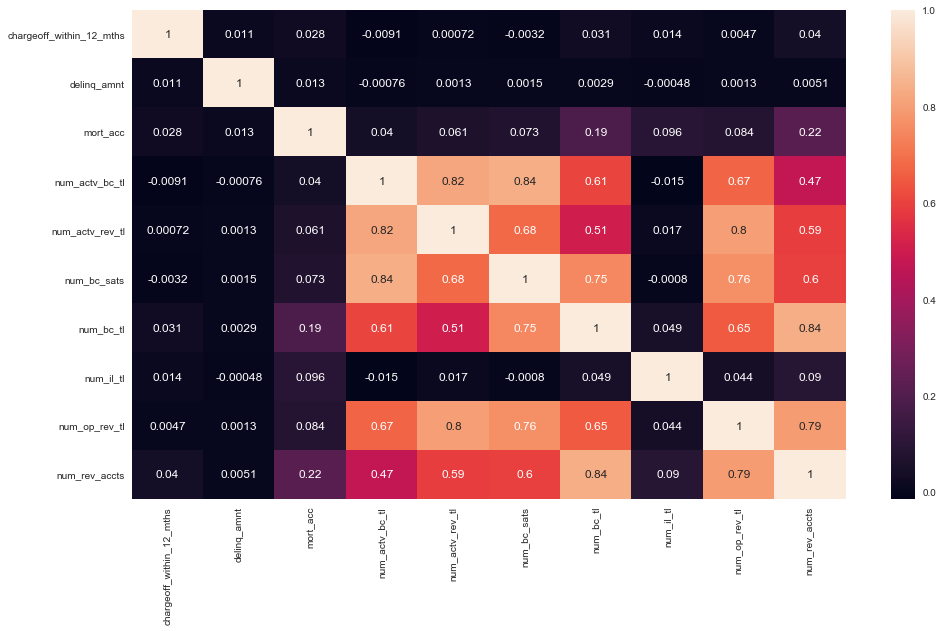

In [84]:
sns.heatmap(df3_cor, 
        xticklabels=df3_cor.columns,
        yticklabels=df3_cor.columns,annot=True)

In [85]:
df4 = float_col.iloc[:, 30:]
df4_cor=df4.corr()

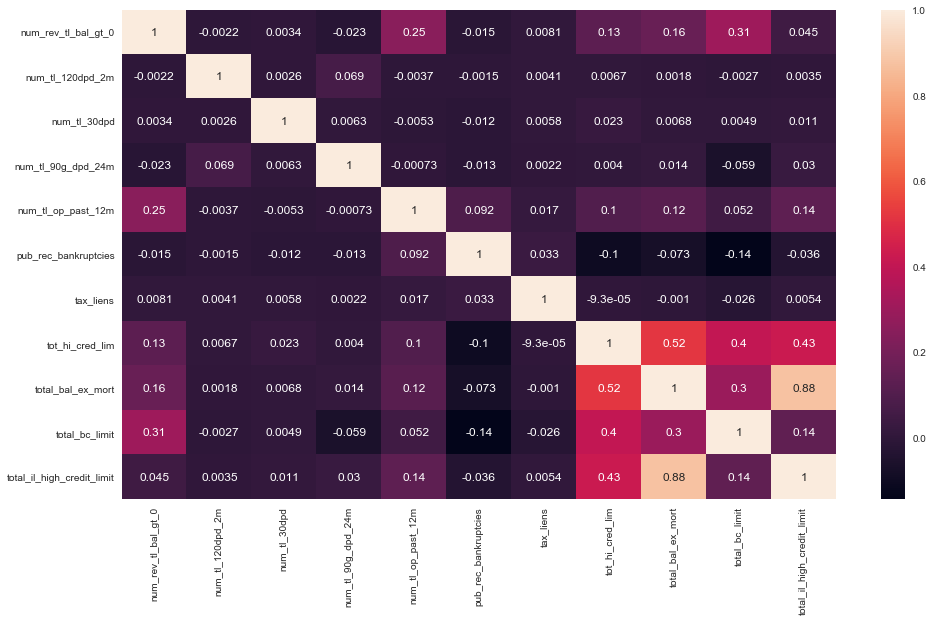

In [86]:
sns.heatmap(df4_cor, 
        xticklabels=df4_cor.columns,
        yticklabels=df4_cor.columns,annot=True)

In [87]:
data.shape

(2260668, 60)

**From the correlation matrix, few columns that are good candidates to determine our analysis are loan_amnt. funded_amnt_inv, installment, loan_status, inq_last_6mths, pub_rec, revol_util, open_il_24m**